In [6]:
from plotly.offline import init_notebook_mode, iplot
from sqlalchemy import create_engine
from IPython.display import display
import chart_studio.plotly as py
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import dask.dataframe as dd
from datetime import datetime
import pandas as pd
import hvplot.dask
import os.path
import pathlib
import pyodbc 

init_notebook_mode()
disk_engine = create_engine('sqlite:///311.db')
db_file=pathlib.Path("311.db")
chunksize=100000
required_columns=['Agency Name','Complaint Type','City']
file='311_Service_Requests_from_2010_to_Present.csv'
server_name = 'cd767c5d883f'
database_name = 'master'


def startMeasurement():
    start_time=datetime.now()
def returnMeasurement(txt):
    measurement=datetime.now()-start_time
    return print(txt,"Czas wykoniania:",measurement)

ImportError: Dask dataframe requirements are not installed.

Please either conda or pip install as follows:

  conda install dask                     # either conda install
  python -m pip install "dask[dataframe]" --upgrade  # or python -m pip install

In [2]:
start_time = datetime.now()
df = pd.read_csv(file,usecols=required_columns, chunksize=chunksize)
chunk_list = []  
for data_chunk in df:  
    data_chunk = data_chunk.rename(columns={c: c.replace(' ', '') for c in data_chunk.columns})
    filtered_df = data_chunk.dropna()
    chunk_list.append(filtered_df)    
chunk_data = pd.concat(chunk_list)

In [3]:
returnMeasurement('zaladowanie pliku oraz przygotowanie.')

zaladowanie pliku oraz przygotowanie. Czas wykoniania: 0:01:23.515367


In [2]:
startMeasurement()
chunk_data['ComplaintType'].value_counts().nlargest(10).plot(kind='pie',autopct='%1.1f%%')

NameError: name 'startMeasurement' is not defined

In [5]:
returnMeasurement('OPIS.')

OPIS. Czas wykoniania: 0:01:25.903730


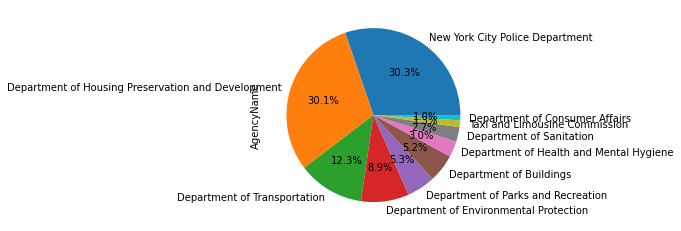

In [6]:
startMeasurement()
chunk_data['AgencyName'].value_counts().nlargest(10).plot(kind='pie',autopct='%1.1f%%')

In [7]:
returnMeasurement('OPIS.')

OPIS. Czas wykoniania: 0:01:28.200326


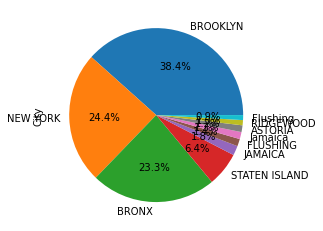

In [8]:
startMeasurement()
chunk_data['City'].value_counts().nlargest(10).plot(kind='pie',autopct='%1.1f%%')

In [9]:
returnMeasurement('OPIS.')

OPIS. Czas wykoniania: 0:01:30.411534


In [10]:
startMeasurement()
dask_df = dd.read_csv(file, usecols=required_columns, dtype='str')
dask_df = dask_df.rename(columns={c: c.replace(' ', '') for c in dask_df.columns})
dask_df = dask_df.dropna()

In [11]:
returnMeasurement('OPIS.')

OPIS. Czas wykoniania: 0:01:30.465504


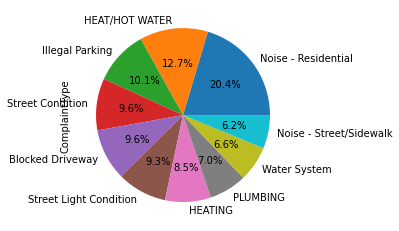

In [12]:
startMeasurement()
dask_df['ComplaintType'].value_counts().nlargest(10).compute().plot(kind='pie',autopct='%1.1f%%')

In [13]:
returnMeasurement('OPIS.')

OPIS. Czas wykoniania: 0:02:19.249514


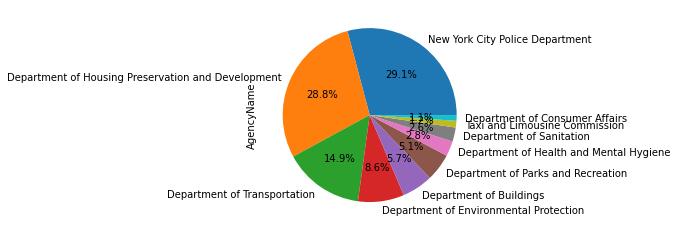

In [14]:
startMeasurement()
dask_df['AgencyName'].value_counts().nlargest(10).compute().plot(kind='pie',autopct='%1.1f%%')

In [15]:
returnMeasurement('OPIS.')

OPIS. Czas wykoniania: 0:03:09.327790


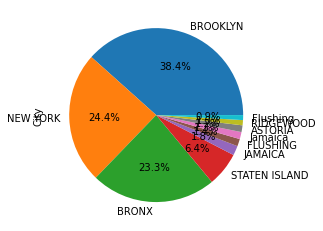

In [16]:
startMeasurement()
dask_df['City'].value_counts().nlargest(10).compute().plot(kind='pie',autopct='%1.1f%%')

In [17]:
returnMeasurement('OPIS.')

OPIS. Czas wykoniania: 0:03:58.258329


In [18]:
if not db_file.exists():
    start = dt.datetime.now()
    j = 0
    index_start = 1
    for df_sqlite3 in pd.read_csv(file, chunksize=chunksize, iterator=True, encoding='utf-8'):

        df_sqlite3 = df_sqlite3.rename(columns={c: c.replace(' ', '') for c in df_sqlite3.columns})
        #df_sqlite3['CreatedDate'] = pd.to_datetime(df_sqlite3['CreatedDate']) 
        #df_sqlite3['ClosedDate'] = pd.to_datetime(df_sqlite3['ClosedDate'])

        df_sqlite3.index += index_start
        for c in df.columns:
            if c not in required_columns:
                df_sqlite3 = df_sqlite3.drop(c, axis=1)
        j+=1
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

In [19]:
startMeasurement()
df = pd.read_sql_query('SELECT City, COUNT(*) as `numbersOf` '
                        'FROM data '
                        'GROUP BY `City` '
                       'COLLATE NOCASE '
                       'ORDER BY -numbersOf '
                       'LIMIT 10 ', disk_engine)
cities = list(df.City)
cities.remove(None)
traces = []
for city in cities:
    df = pd.read_sql_query('SELECT ComplaintType, COUNT(*) as `numbersOf` '
                           'FROM data '
                           'WHERE City = "{}" COLLATE NOCASE '
                           'GROUP BY `ComplaintType` '
                           'ORDER BY -numbersOf LIMIT 10'.format(city), disk_engine)

    traces.append(go.Bar(x=df['ComplaintType'], y=df.numbersOf, name=city.capitalize()))

iplot({'data': traces, 'layout': go.Layout(barmode='stack', xaxis={'tickangle': 40}, margin={'b': 150})}, filename='311/complaints by city stacked')

In [20]:
returnMeasurement('OPIS.')

OPIS. Czas wykoniania: 0:05:27.386185


In [21]:
startMeasurement()
df = pd.read_sql_query('SELECT ComplaintType, COUNT(*) as `numbersOf`'
                       'FROM data '
                       'GROUP BY ComplaintType '
                       'ORDER BY -numbersOf LIMIT 10', disk_engine)
iplot([go.Bar(x=df.ComplaintType, y=df.numbersOf)], filename='Najczesciej zglaszane skargi')

In [22]:
returnMeasurement('OPIS.')

OPIS. Czas wykoniania: 0:05:52.785048


In [33]:
startMeasurement()
df = pd.read_sql_query('SELECT AgencyName, COUNT(*) as `numbersOf`'
                       'FROM data '
                       'GROUP BY AgencyName '
                       'ORDER BY -numbersOf LIMIT 10', disk_engine)
iplot([go.Bar(x=df.AgencyName, y=df.numbersOf)], filename='Najczestsze urzedy')

OperationalError: (sqlite3.OperationalError) no such column: AgencyName
[SQL: SELECT AgencyName, COUNT(*) as `numbersOf`FROM data GROUP BY AgencyName ORDER BY -numbersOf LIMIT 10]
(Background on this error at: http://sqlalche.me/e/13/e3q8)

In [2]:
returnMeasurement('OPIS.')

NameError: name 'start_time' is not defined

In [15]:
startMeasurement()
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=localhost,1433;'
                      'Database=PRequest;'
                      'UID=SA;'
                      'PWD=Abc12345678;')

cursor = conn.cursor()


In [ ]:

#start_time = datetime.now()
#df = pd.read_csv(file,usecols=required_columns, chunksize=chunksize)
#chunk_list = []  
#for data_chunk in df:  
#    data_chunk = data_chunk.rename(columns={c: c.replace(' ', '') for c in data_chunk.columns})
#    filtered_df = data_chunk.dropna()
#    chunk_list.append(filtered_df)    
#chunk_data = pd.concat(chunk_list)
#chunk_data.to_csv (r'C:\Users\ROOT\Desktop\311.csv', index = False, header=True)

In [25]:
startMeasurement()
sql_df = pd.read_sql_query('SELECT TOP 10 ComplaintType, COUNT(*) as numbersOf FROM export_dataframe_csv GROUP BY ComplaintType ORDER BY numbersOf desc', conn)
iplot([go.Bar(x=sql_df.ComplaintType, y=sql_df.numbersOf)], filename='Najczesciej zglaszane skargi')

In [ ]:
returnMeasurement('OPIS.')

In [27]:
startMeasurement()
sql_df = pd.read_sql_query('SELECT TOP 10 AgencyName, COUNT(*) as numbersOf FROM export_dataframe_csv GROUP BY AgencyName ORDER BY numbersOf desc', conn)
iplot([go.Bar(x=sql_df.AgencyName, y=sql_df.numbersOf)], filename='Najczesciej zglaszane skargi')

In [ ]:
returnMeasurement('OPIS.')

ValueError: list.remove(x): x not in list